
# Stellar Classification

<img src="data/header.jpg"/>

In this project, I'm going to train some Machine Learning models to classify stellar into star, galaxy or quasar based on their spectral characteristics, using a dataset downloaded from Kaggle Plataform provided by fedesoriano. The dataset was released  by Sloan Digital Sky Survey DR17 under public domain.


## About the dataset

"Stellar classification, in astronomy, is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics."

***Identifying galaxies, quasars, and stars with machine learning: A new catalogue of classifications for 111 million SDSS sources without spectra. A. O. Clarke, A. M. M. Scaife, R. Greenhalgh and V. Griguta; A&A, 639 (2020) A84; DOI: https://doi.org/10.1051/0004-6361/201936770***

## Content

The data consists of **100,000 observations** of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by **17 feature columns** and **1 class column** which identifies it to be either a **star, galaxy or quasar**.

Attributes:

- **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- **alpha** = Right Ascension angle (at J2000 epoch)
- **delta** = Declination angle (at J2000 epoch)
- **u** = Ultraviolet filter in the photometric system
- **g** = Green filter in the photometric system
- **r** = Red filter in the photometric system
- **i** = Near Infrared filter in the photometric system
- **z** = Infrared filter in the photometric system
- **run_ID** = Run Number used to identify the specific scan
- **rereun_ID** = Rerun Number to specify how the image was processed
- **cam_col** = Camera column to identify the scanline within the run
- **field_ID** = Field number to identify each field
- **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same - spec_obj_ID must share the output class)
- **class** = object class (galaxy, star or quasar object)
- **redshift** = redshift value based on the increase in wavelength
- **plate** = plate ID, identifies each plate in SDSS
- **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## Citations

fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

# Import, Analyse and Preprocess data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/star_classification.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
train_df = data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1)

In [6]:
import seaborn as sns

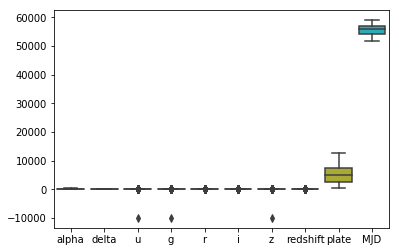

In [7]:
sns.boxplot(data=train_df)

In [8]:
train_df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'MJD'],
      dtype='object')

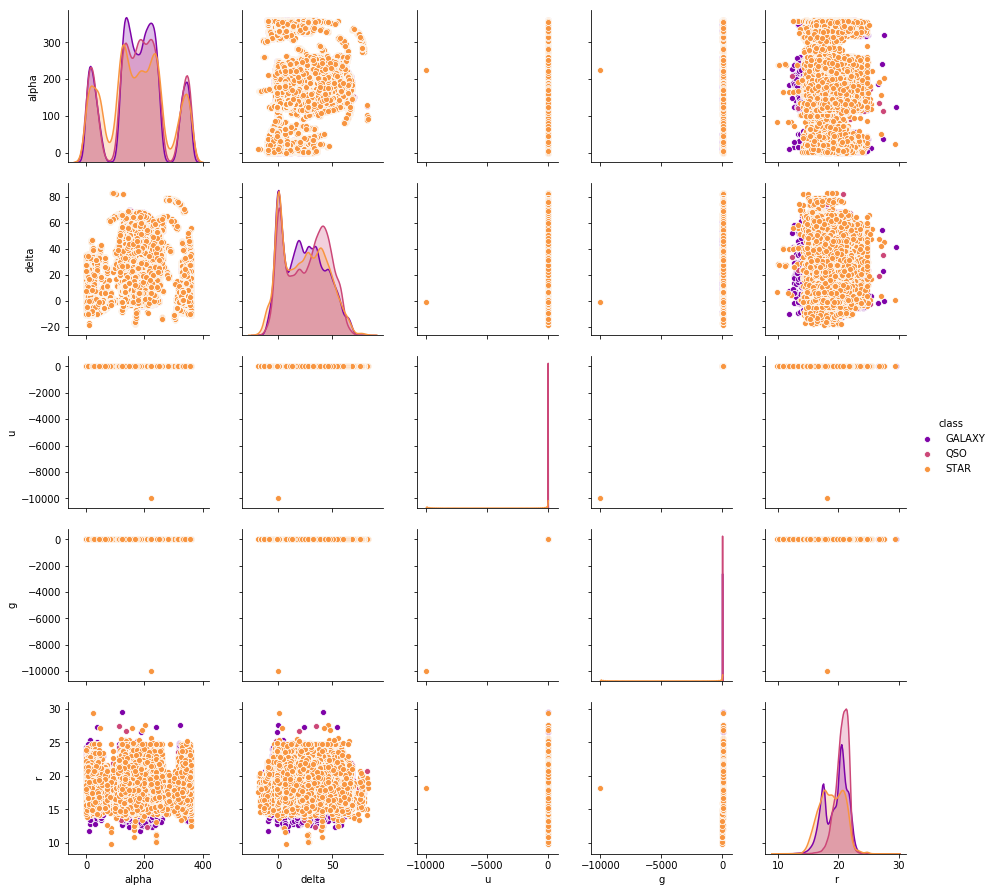

In [9]:
sns.pairplot(data=train_df[['alpha', 'delta', 'u', 'g', 'r', 'class']], hue='class', palette='plasma')

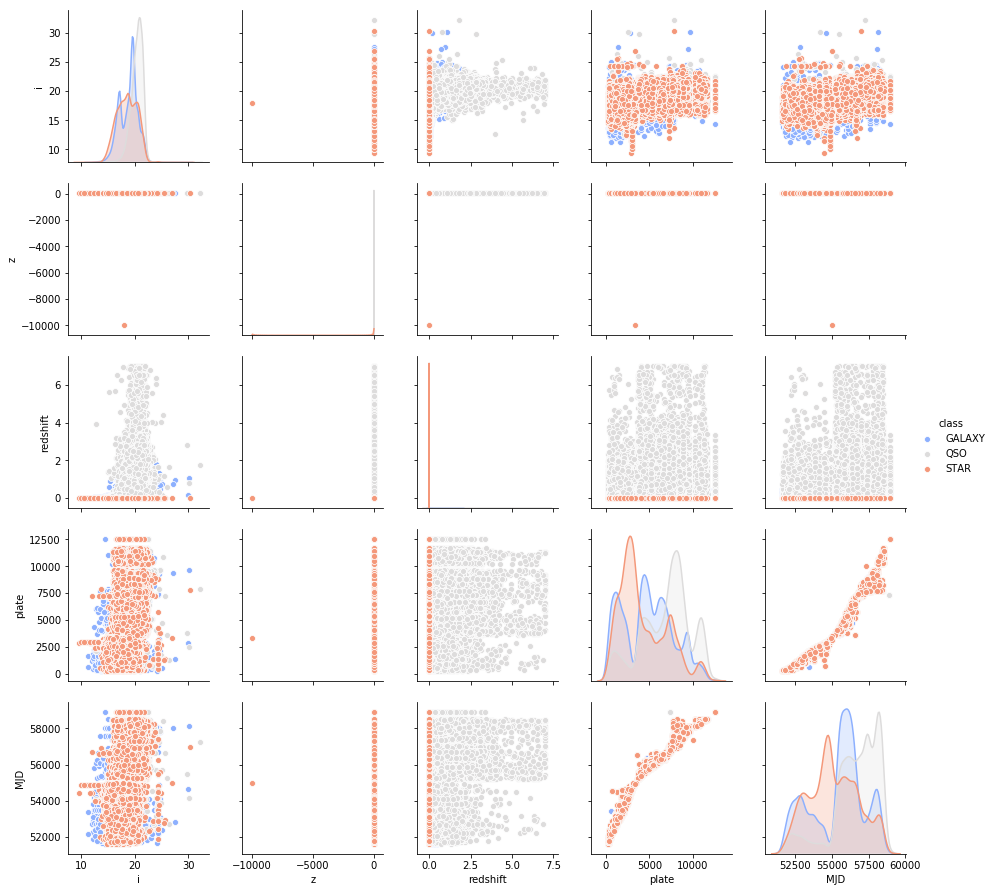

In [10]:
sns.pairplot(data=train_df[['i', 'z', 'redshift', 'plate', 'MJD', 'class']], hue='class', palette='coolwarm')

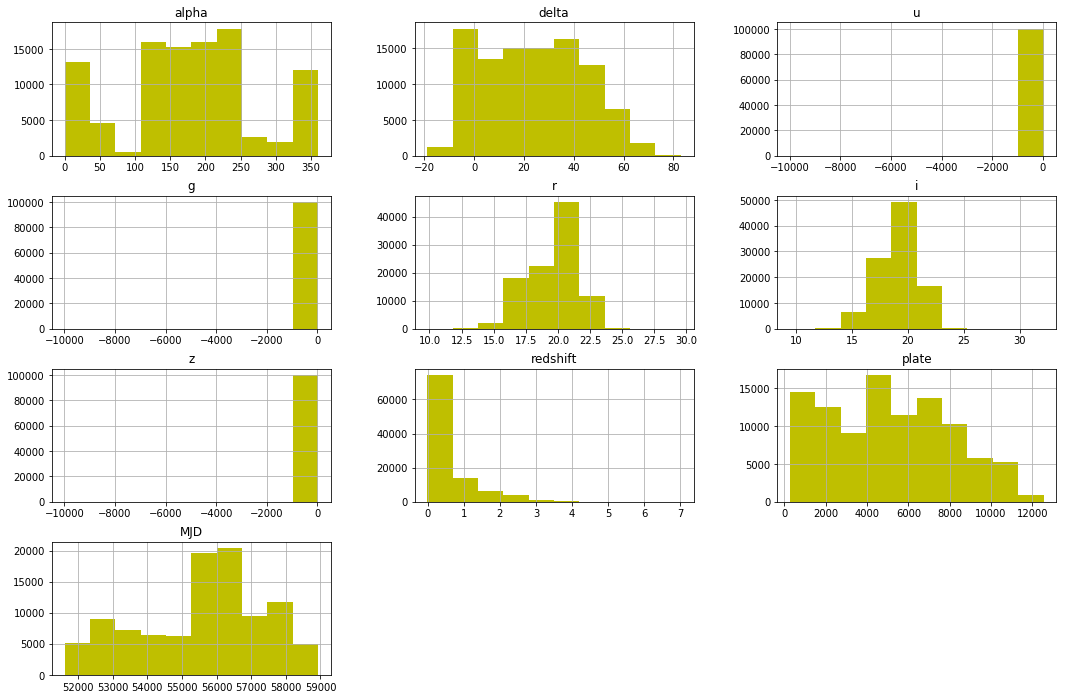

In [11]:
train_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']].hist(figsize=(18, 12), color='y');

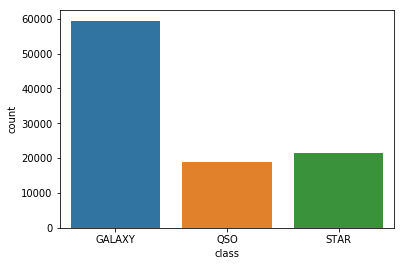

In [12]:
sns.countplot(train_df['class'])

In [13]:
train_df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = train_df.drop('class', axis=1)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
y = train_df['class'].map({'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2})
y[:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
stdScaler = StandardScaler()

In [18]:
numeric_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']

X_train = pd.DataFrame(stdScaler.fit_transform(X_train), columns=numeric_cols)
X_test = pd.DataFrame(stdScaler.transform(X_test), columns=numeric_cols)

In [19]:
X_train.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD
0,0.785462,-0.259030,0.091714,0.043226,0.611363,0.421915,0.053987,-0.176846,-1.211856,-1.339322
1,-0.046886,2.202909,-0.038609,-0.053446,-1.103159,-1.097398,-0.052464,-0.605736,-1.576673,-2.020132
2,0.202425,1.470150,0.117129,0.042385,0.343835,0.119544,0.006474,-0.005164,0.548486,0.456245
3,0.678154,0.864727,0.084102,0.057178,0.911602,0.712613,0.020430,0.235890,1.147586,1.276539
4,0.127113,-1.340036,0.046857,0.022018,-0.031690,-0.339934,-0.022640,-0.789566,-0.752445,-0.542276


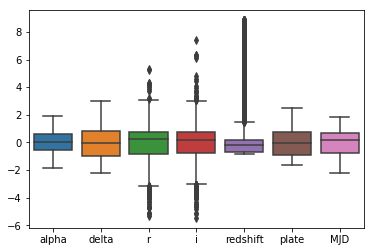

In [20]:
sns.boxplot(data=X_train[['alpha', 'delta', 'r', 'i', 'redshift', 'plate', 'MJD']])

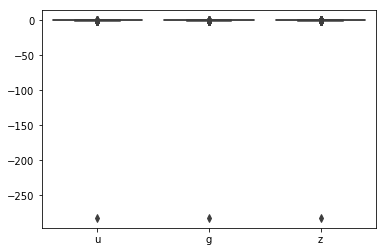

In [21]:
sns.boxplot(data=X_train[['u', 'g', 'z']])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
dt = DecisionTreeClassifier(min_samples_leaf=14, random_state=1)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=14, random_state=1)

In [26]:
dt.score(X_test, y_test)

0.97725

In [27]:
pred_dt = dt.predict(X_test)

In [28]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       1.00      1.00      1.00      4308
           2       0.96      0.93      0.94      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



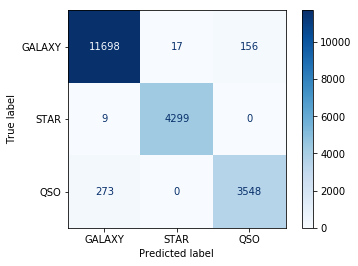

In [29]:
cmdt = confusion_matrix(y_test, pred_dt)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmdt, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)

In [33]:
rf.score(X_test, y_test) 

0.97935

In [34]:
pred_rf = rf.predict(X_test)

In [35]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       0.99      1.00      1.00      4308
           2       0.97      0.94      0.95      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



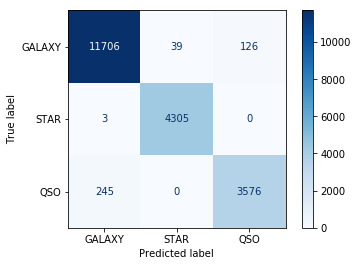

In [36]:
cmrf = confusion_matrix(y_test, pred_rf)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmrf, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

# Extra Tree Model

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
ex = ExtraTreesClassifier(n_estimators=400, min_samples_leaf=18, random_state=1)

In [39]:
ex.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)

In [40]:
ex.score(X_test, y_test)

0.9655

In [41]:
pred_ex = ex.predict(X_test)

In [42]:
print(classification_report(y_test, pred_ex))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11871
           1       0.97      0.98      0.97      4308
           2       0.97      0.90      0.94      3821

    accuracy                           0.97     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.97      0.97      0.97     20000



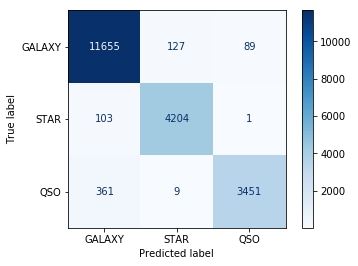

In [43]:
cmex = confusion_matrix(y_test, pred_ex)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmex, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

# XGBoost Model

In [44]:
from xgboost import XGBClassifier

In [45]:
xgb = XGBClassifier(n_estimators=400, 
                    use_label_encoder=False, 
                    random_state=1, objective='multi:softmax', 
                    num_class=3, 
                    eval_metric = 'mlogloss')

In [46]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

In [47]:
xgb.score(X_test, y_test)

0.98115

In [48]:
pred_xgb = xgb.predict(X_test)

In [49]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       1.00      1.00      1.00      4308
           2       0.96      0.94      0.95      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



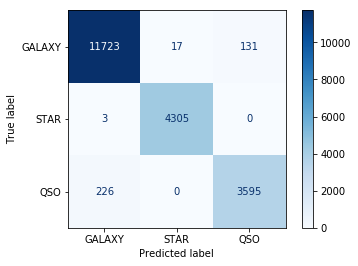

In [50]:
cmxgb = confusion_matrix(y_test, pred_xgb)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

# Adaboost Model

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada = AdaBoostClassifier()

In [54]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [55]:
ada.score(X_test, y_test)

0.77065

In [56]:
pred_ada = ada.predict(X_test)

In [57]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     11871
           1       0.98      1.00      0.99      4308
           2       0.11      0.03      0.04      3821

    accuracy                           0.77     20000
   macro avg       0.61      0.65      0.62     20000
weighted avg       0.68      0.77      0.71     20000



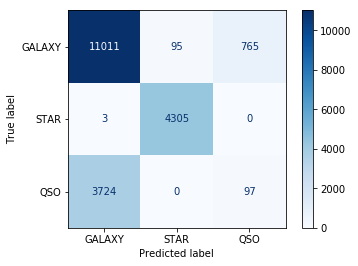

In [58]:
cmada = confusion_matrix(y_test, pred_ada)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmada, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);